## Investigasi sampel data titanic berikut dengan cara :
1. Cek secara head, tail, sample, info lalu observasi apa yang bisa anda peroleh ?
2. Lakukan Statistical Summary dengan mengekstrak informasi yang didapat dari observasi anda ?
3. Cek apakah ada duplikat dan bagaimana handlenya ?
4. Cek apakah ada missing value, berapa persentasenya jika ada, dan bagaimana cara handlenya ?

## Import Libraries

In [315]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

##Load Data

In [316]:
#import data
import pandas as pd

df=pd.read_excel('Data_Covid.xlsx')
data = df.copy()

##Preliminary

In [317]:
# Menampilkan 5 data teratas
data.head()

,name,sex,age,tested_positive,hospitalized,symptom_onset_date,comorbidity
0,Patricia Soto,male,34.0,1,yes,2021-04-04,none
1,Jessica Burke,female,33.0,1,yes,2021-09-19,none
2,Juan Martinez,male,26.0,1,yes,2021-09-29,asthma
3,Jessica Ward,male,47.0,0,no,2021-05-14,none
4,Kimberly Walker,male,45.0,1,no,2021-09-20,diabetes


In [318]:
# Menampilkan 5 data terbawah
data.tail()

,name,sex,age,tested_positive,hospitalized,symptom_onset_date,comorbidity
505,Justin Thomas,female,42.0,1,no,2022-02-01,none
506,Lisa Mcdonald,female,32.0,0,no,2021-12-18,none
507,Darrell Wilson,male,15.0,0,no,2021-08-16,none
508,Heather Douglas,male,37.0,1,no,2022-03-15,none
509,Craig Woods,male,58.0,1,yes,2022-02-11,cancer


In [319]:
# Menampilkan 5 random sampel dari data
data.sample(5)

,name,sex,age,tested_positive,hospitalized,symptom_onset_date,comorbidity
9,Melody Ortiz,female,47.0,0,no,2021-03-05,none
236,Kristina Moreno,female,48.0,0,yes,2021-02-01,cancer
61,Mr. Robert Rose,male,50.0,1,no,2021-04-06,cancer
439,Abigail Vargas,male,44.0,1,yes,2022-03-06,hypertension
51,Nichole Gordon,female,21.0,1,yes,2021-08-24,diabetes


In [320]:
#Menampilkan info dari data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   name                510 non-null    object        
 1   sex                 510 non-null    object        
 2   age                 489 non-null    float64       
 3   tested_positive     510 non-null    int64         
 4   hospitalized        510 non-null    object        
 5   symptom_onset_date  510 non-null    datetime64[ns]
 6   comorbidity         510 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 28.0+ KB


##Statistical Summary





In [321]:
#Melihat kolom apa saja yang ada pada excel
data.columns

Index(['name', 'sex', 'age', 'tested_positive', 'hospitalized',
       'symptom_onset_date', 'comorbidity'],
      dtype='object')

In [322]:
# Mengelompokkan kolom berdasarkan tipe data
categoricals = ['name', 'sex', 'hospitalized', 'comorbidity']
numericals = ['age', 'tested_positive']

In [323]:
#Menampilkan statistical summary dari data numerik
data[numericals].describe()

,age,tested_positive
count,489.000000,510.000000
mean,40.443763,0.607843
std,14.698939,0.488711
min,0.000000,0.000000
25%,31.000000,0.000000
50%,41.000000,1.000000
75%,50.000000,1.000000
max,78.000000,1.000000


In [324]:
#Menampilkan categorical summary dari data kategori
data[categoricals].describe()

,name,sex,hospitalized,comorbidity
count,510,510,510,510
unique,500,2,2,5
top,Michael Perez,female,no,cancer
freq,3,260,358,111


In [325]:
#Menampilkan detail dari data numerik
for col in numericals:
  print(data[col].value_counts())

age
45.0    23
42.0    20
39.0    17
40.0    15
43.0    14
49.0    14
37.0    13
44.0    13
51.0    13
35.0    13
34.0    13
50.0    12
32.0    11
38.0    11
62.0    10
30.0    10
52.0    10
46.0    10
24.0    10
28.0    10
47.0     9
33.0     9
29.0     9
21.0     9
56.0     9
63.0     8
19.0     8
41.0     8
36.0     8
27.0     8
53.0     8
59.0     7
31.0     7
25.0     7
58.0     7
60.0     6
48.0     6
54.0     6
15.0     6
22.0     6
57.0     6
20.0     5
66.0     5
26.0     4
64.0     4
14.0     4
18.0     4
68.0     3
12.0     3
13.0     3
61.0     3
72.0     3
55.0     3
74.0     2
69.0     2
8.0      2
23.0     2
71.0     2
65.0     2
2.0      2
11.0     2
5.0      2
4.0      1
17.0     1
3.0      1
16.0     1
0.0      1
7.0      1
73.0     1
78.0     1
Name: count, dtype: int64
tested_positive
1    310
0    200
Name: count, dtype: int64


In [326]:
#Menampilkan detail dari data kategori
for col in categoricals:
  print(data[col].value_counts())

name
Michael Perez             3
Darrell Wilson            2
Heather Douglas           2
Craig Woods               2
Timothy Smith             2
Justin Thomas             2
David Ramirez             2
Lisa Mcdonald             2
Chelsea Kramer            2
William King              1
Cindy Smith               1
Misty Baker               1
Elizabeth Hernandez       1
Cory Long                 1
Mr. George Thompson       1
Michael Davis             1
Dr. Christopher Martin    1
Kevin Spencer             1
Brandy Butler             1
Ashley Robertson          1
Albert Jordan             1
Rhonda Holmes             1
Amanda Larson             1
Mary Noble                1
Katherine Lee             1
Michael Mcdowell          1
Timothy Thomas            1
Michael Bradley           1
Russell Howe              1
Scott Campbell            1
Matthew Cervantes         1
Cody Silva                1
Steven Jimenez            1
Lisa Ward                 1
Elaine Cook               1
Krista Chavez  

##Data Cleansing

Duplicated Data

In [327]:
len(data)

510

In [328]:
# Memeriksa apakah ada duplikasi
print(df.duplicated().sum())

8


In [329]:
len(data.drop_duplicates())/ len(data)

0.984313725490196

In [330]:
duplicates = data[data.duplicated(keep=False)]
duplicates = duplicates.sort_values(by=list(data.columns))
display(duplicates)

,name,sex,age,tested_positive,hospitalized,symptom_onset_date,comorbidity
73,Chelsea Kramer,female,NaN,0,no,2022-02-28,asthma
503,Chelsea Kramer,female,NaN,0,no,2022-02-28,asthma
124,Craig Woods,male,58.0,1,yes,2022-02-11,cancer
509,Craig Woods,male,58.0,1,yes,2022-02-11,cancer
394,Darrell Wilson,male,15.0,0,no,2021-08-16,none
507,Darrell Wilson,male,15.0,0,no,2021-08-16,none
377,Heather Douglas,male,37.0,1,no,2022-03-15,none
508,Heather Douglas,male,37.0,1,no,2022-03-15,none
155,Justin Thomas,female,42.0,1,no,2022-02-01,none
505,Justin Thomas,female,42.0,1,no,2022-02-01,none


In [331]:
# Menghapus baris duplikasi
df = df.drop_duplicates()

In [332]:
# Memastikan duplikasi telah dihapus
print(df.duplicated().sum())

0


Handling Duplicates

In [333]:
dup_count = duplicates.groupby(list(data.columns)).size().reset_index(name = "duplicates count")

sorted_duplicates=dup_count.sort_values(by = ['duplicates count'], ascending = False)

sorted_duplicates

,name,sex,age,tested_positive,hospitalized,symptom_onset_date,comorbidity,duplicates count
0,Craig Woods,male,58.0,1,yes,2022-02-11,cancer,2
1,Darrell Wilson,male,15.0,0,no,2021-08-16,none,2
2,Heather Douglas,male,37.0,1,no,2022-03-15,none,2
3,Justin Thomas,female,42.0,1,no,2022-02-01,none,2
4,Lisa Mcdonald,female,32.0,0,no,2021-12-18,none,2
5,Michael Perez,male,57.0,1,yes,2021-09-16,hypertension,2
6,Timothy Smith,male,49.0,0,yes,2021-02-16,cancer,2


In [334]:
data = data.drop_duplicates()

len(data)

502

In [335]:
len(df.drop_duplicates())/ len(data)

1.0

Null Values

In [336]:
#Melihat Jumlah Value null untuk setiap kolom
data.isna().sum()

,0
name,0
sex,0
age,20
tested_positive,0
hospitalized,0
symptom_onset_date,0
comorbidity,0


In [337]:
#Melihat Jumlah Value null untuk setiap kolom
data.isnull().sum()

,0
name,0
sex,0
age,20
tested_positive,0
hospitalized,0
symptom_onset_date,0
comorbidity,0


Fill Null Values

In [338]:
print(data['age'].dtype)
print(data['age'].median())

float64
41.0


In [339]:
# Mengisi nilai yang hilang dengan median hanya untuk kolom numerik
for column in data.select_dtypes(include=['number']).columns:
    data[column] = data[column].fillna(data[column].median())

<ipython-input-339-a8df80339ed5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].fillna(data[column].median())


In [340]:
#Melihat Jumlah Value null untuk setiap kolom
data.isna().sum()

,0
name,0
sex,0
age,0
tested_positive,0
hospitalized,0
symptom_onset_date,0
comorbidity,0


##Info Data Final

In [341]:
#Menampilkan info data setelah proses handling duplicates
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 502 entries, 0 to 501
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   name                502 non-null    object        
 1   sex                 502 non-null    object        
 2   age                 502 non-null    float64       
 3   tested_positive     502 non-null    int64         
 4   hospitalized        502 non-null    object        
 5   symptom_onset_date  502 non-null    datetime64[ns]
 6   comorbidity         502 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 31.4+ KB


##VISUALISASI DATA

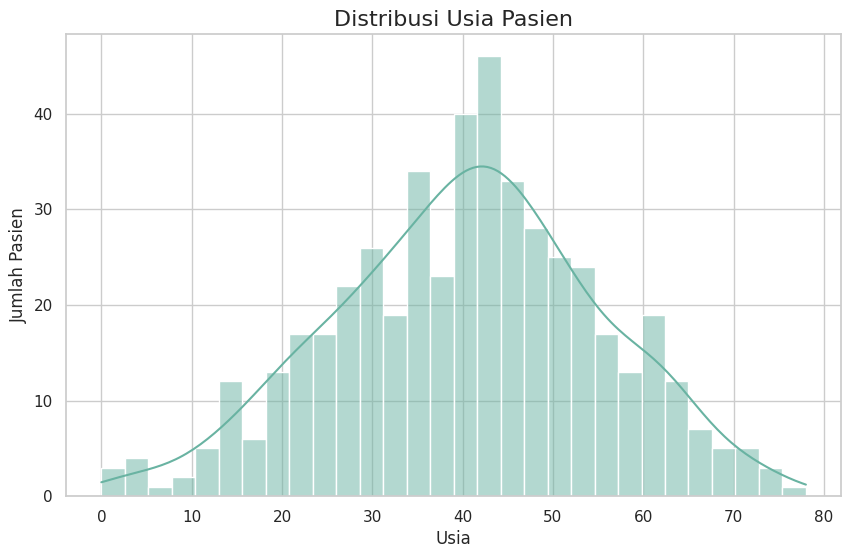

In [342]:
# Histogram Usia
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True, color='#69b3a2')
plt.title('Distribusi Usia Pasien', fontsize=16)
plt.xlabel('Usia')
plt.ylabel('Jumlah Pasien')
plt.grid(True)
plt.show()

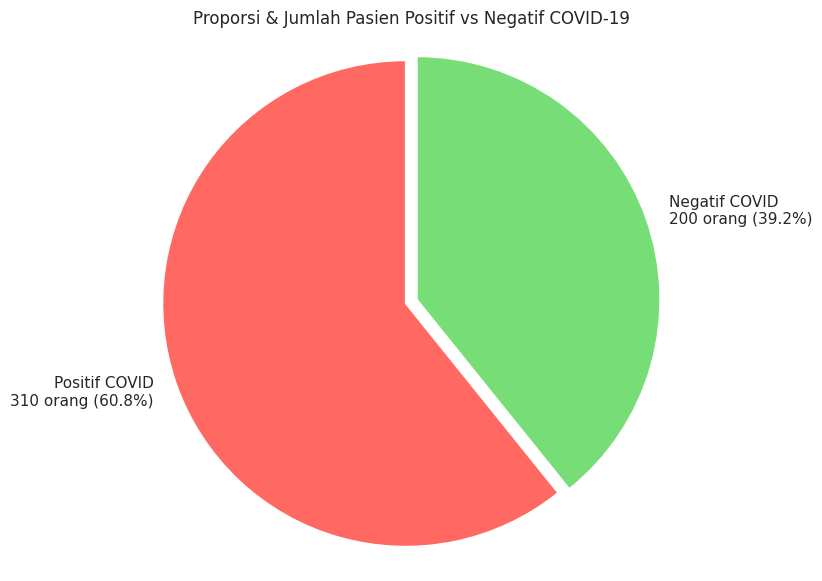

In [343]:
# Pie Chart Status Positif Covid
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('/content/Data_Covid.xlsx')

jumlah = df['tested_positive'].value_counts()
proporsi = df['tested_positive'].value_counts(normalize=True)

labels = [
    f'Positif COVID\n{jumlah[1]} orang ({proporsi[1]*100:.1f}%)',
    f'Negatif COVID\n{jumlah[0]} orang ({proporsi[0]*100:.1f}%)'
]

colors = ['#ff6961', '#77dd77']
explode = (0.05, 0)

plt.figure(figsize=(7, 7))
plt.pie(jumlah, labels=labels, autopct='', startangle=90, colors=colors, explode=explode)
plt.title('Proporsi & Jumlah Pasien Positif vs Negatif COVID-19')
plt.axis('equal')
plt.show()

<ipython-input-344-d2548987b43f>:23: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


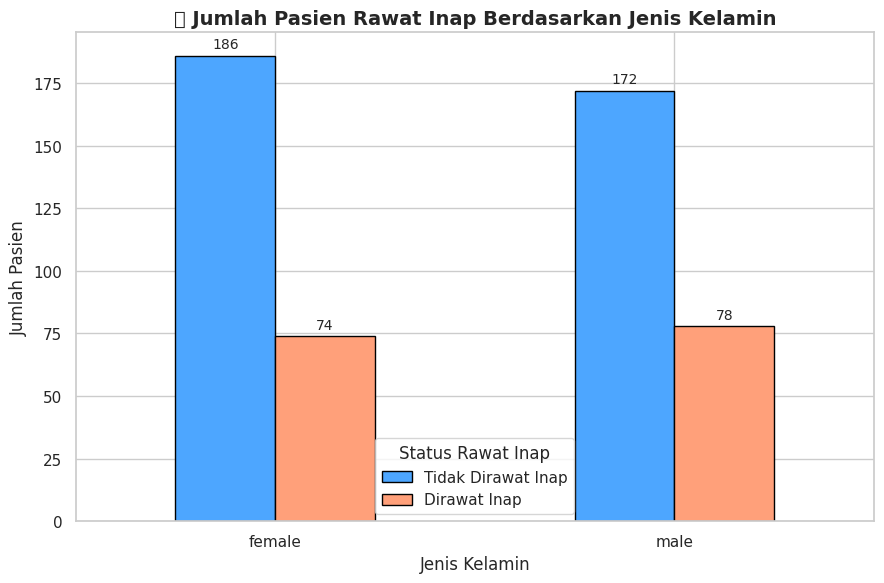

In [344]:
# Barplot Rawat Inap berdasarkan Jenis Kelamin
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('/content/Data_Covid.xlsx')
rawat_inap_gender = df.groupby(['sex', 'hospitalized']).size().unstack(fill_value=0)

rawat_inap_gender.columns = ['Tidak Dirawat Inap', 'Dirawat Inap']
rawat_inap_gender.index.name = 'Jenis Kelamin'

sns.set(style='whitegrid')
colors = ['#4DA6FF', '#FFA07A']

ax = rawat_inap_gender.plot(kind='bar', figsize=(9, 6), color=colors, edgecolor='black')

plt.title('📊 Jumlah Pasien Rawat Inap Berdasarkan Jenis Kelamin', fontsize=14, weight='bold')
plt.xlabel('Jenis Kelamin', fontsize=12)
plt.ylabel('Jumlah Pasien', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Status Rawat Inap')
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fontsize=10)
plt.show()


<ipython-input-345-2de791b44496>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='comorbidity', data=df, order=df['comorbidity'].value_counts().index, palette='coolwarm')


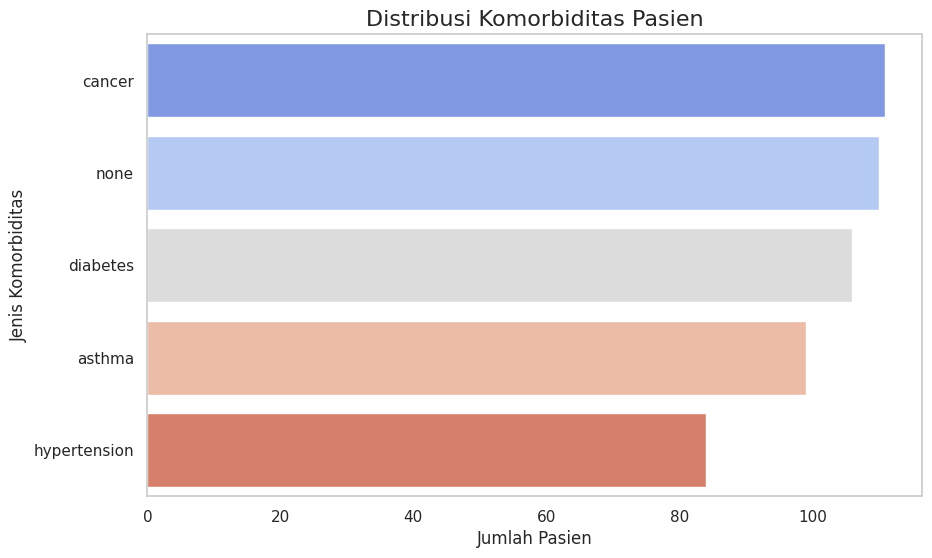

In [345]:
# Barplot Komorbiditas
plt.figure(figsize=(10, 6))
sns.countplot(y='comorbidity', data=df, order=df['comorbidity'].value_counts().index, palette='coolwarm')
plt.title('Distribusi Komorbiditas Pasien', fontsize=16)
plt.xlabel('Jumlah Pasien')
plt.ylabel('Jenis Komorbiditas')
plt.grid(axis='x')
plt.show()


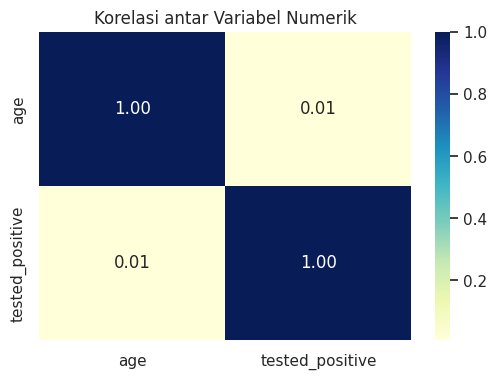

In [346]:
# Heatmap Korelasi
plt.figure(figsize=(6, 4))
sns.heatmap(df[['age', 'tested_positive']].corr(), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Korelasi antar Variabel Numerik')
plt.show()

In [347]:
# Menyimpan data ke file CSV
data.to_csv('hasil_analisis_covid.csv', index=False)


In [348]:
# Menyimpan data ke file Excel
data.to_excel('hasil_analisis_covid.xlsx', index=False)